In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [4]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2
kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
selected = pd.DataFrame(kbest)
# selected.head()

In [6]:
# To check the scores
model = SelectKBest(chi2, k=20).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns

# df.sort_values(by = ['score'], ascending = False).head(40)

In [7]:
nw_df =numerical[['RFA_2F','CARDGIFT','HVP1','ETH2','RP1','NGIFTALL','HV1','ETHC5','CARDPROM','NUMPROM','RP3','CLUSTER2','INCOME','IC15','MSA','CONTROLN','HHAS4','HC6','POBC2','MHUC1']]

In [8]:
new_df = pd.DataFrame(nw_df)

In [9]:
all_data = pd.concat((new_df,targets),axis=1)
data_B = all_data.drop(['TARGET_D'], axis=1)

In [10]:
# X/y split
X = data_B.drop('TARGET_B',axis = 1)
y = data_B['TARGET_B']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
train=pd.concat((X_train,y_train),axis=1)

In [13]:
train = pd.DataFrame(train)

In [14]:
from sklearn.utils import resample

category_0 = train[data_B['TARGET_B'] == 0]
category_1 = train[data_B['TARGET_B'] == 1]

C:\Users\moshi\AppData\Local\Temp/ipykernel_29068/2834848187.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_0 = train[data_B['TARGET_B'] == 0]
C:\Users\moshi\AppData\Local\Temp/ipykernel_29068/2834848187.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_1 = train[data_B['TARGET_B'] == 1]


In [15]:
#upsampling

# we create a category 1 oversampeled. we are creating the same rows like in category 0
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [16]:
# and now we have the same shape
print(category_0.shape)
print(category_1_oversampled.shape)

(67900, 21)
(67900, 21)


In [17]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [19]:
X_train = data_upsampled.drop('TARGET_B',axis = 1)
y_train = data_upsampled['TARGET_B']

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [31]:
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.8931790550454869
train data accuracy was  0.995780559646539


In [32]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

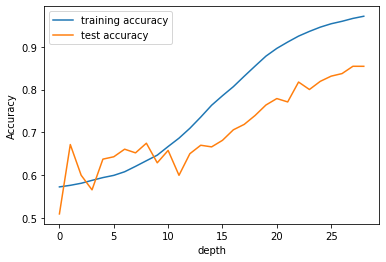

In [36]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()

In [34]:
model = DecisionTreeClassifier(max_depth = 40)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

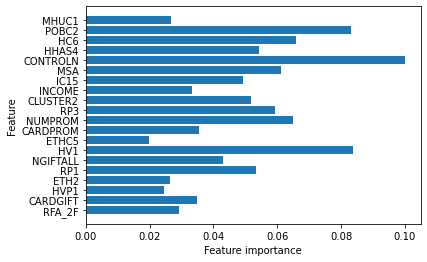

In [35]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(model)

In [ ]:
# oversampling helped me get better test result but I had to use a big depth (40) and I don't know if it's wrong